In [17]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
from matplotlib.ticker import MaxNLocator

# Define some colors and contours

In [19]:
#Greiner map
greiner_data = {
    'red': ((0., 1, 1,), (.2, 0, 0), (.48, 0, 0), (.728, 1, 1),(0.912, 1, 1), (1, .5, .5)),
    'green': ((0., 1, 1), (.2, 0, 0), (.3, 0, 0), (.5, 1, 1),(.712, 1, 1), (.928, 0, 0), (1, 0, 0)),
    'blue': ((0., 1, 1), (.2, .5, .5), (.288, 1, 1), (.472, 1, 1),(.72, 0, 0), (1, 0, 0))
                }
greiner = LinearSegmentedColormap('greiner',greiner_data)
#cmap=greiner
levels = MaxNLocator(nbins=15).tick_values(0.015,0.55)
norm = BoundaryNorm(levels, ncolors=greiner.N, clip=True)

# Creates an array of n numbers between 0-1

In [20]:
n=500
T_random = []
for i in range (500):
    T_random.append(np.random.rand())
T_random = np.array(T_random)

(array([52., 43., 53., 40., 50., 50., 46., 65., 41., 60.]),
 array([0.00129897, 0.10080941, 0.20031986, 0.2998303 , 0.39934075,
        0.4988512 , 0.59836164, 0.69787209, 0.79738253, 0.89689298,
        0.99640342]),
 <a list of 10 Patch objects>)

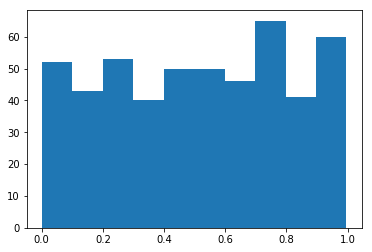

In [21]:
plt.hist(T_random)

# Gausssian distribution and the spread of the thermal cloud

In [22]:
def gaussian(x, sigma=1.3):
    return (np.sqrt(4.3)/(sigma*np.sqrt(2.0*np.pi)))*np.exp(-(1.0/2.0)*(x/sigma)**2)

In [23]:
def sigma_therm(T):
    if T>=0 and T<=1:
        return 4.0+T
    else:
        print ('Deja de estar mamando')

In [24]:
def bt_ratio(T):
    
    if T<=0.65:
        bec_presence = 2.0/(1.0+np.exp(8.0*(T-0.65))) - 1.0
    else:
        bec_presence = 0.0
        
    return bec_presence, 1.0 - bec_presence

# Range in space

In [25]:
x = np.linspace(-18, 18, num=200)

# Let us create the 2D-dimension cloud of atoms

In [26]:
#Temp = np.linspace(0.0,1.0, 11)[::-1]

#plt.figure(figsize=(8,6))
#plt.ylim(-0.03,0.45)

n=0
Double = []
for Tt in T_random:
    A_bec, A_therm = bt_ratio(Tt)
    #print (A_bec, A_therm)

    G_therm = gaussian(x=x, sigma=sigma_therm(Tt))
    G_bec = gaussian(x=x)

    M = 2.0*A_therm*G_therm.reshape(200,1)*G_therm.reshape(1,200) + A_bec*G_bec.reshape(200,1)*G_bec.reshape(1,200)

    noise = 0.006*np.random.normal(loc=0.0, scale=1.0, size=M.shape)

    M = M + noise/2.0
    
    #plt.figure(figsize=(5,5))
    #plt.contourf(M,cmap='viridis',norm=norm)
    #plt.imshow(M)
    
    np.savetxt('Matrices/Cloud_{}.txt'.format(int(n+1000)),M,fmt='%.18e',delimiter=' ')
    
    if Tt<=0.65:
        Double.append(1)
    else:
        Double.append(0)
    
    n+=1

np.savetxt('Matrices/Temperature.txt',T_random,fmt='%.2f',delimiter=' ')
np.savetxt('Matrices/Target.txt',Double,fmt='%i',delimiter=' ')

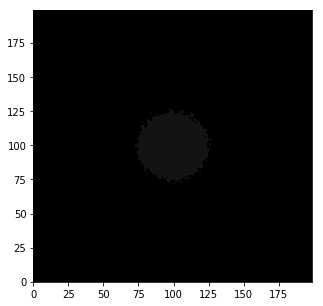

In [27]:
plt.figure(figsize=(5,5))
plt.contourf(M,cmap=plt.cm.gray,norm=norm)

(-0.1, 1.8)

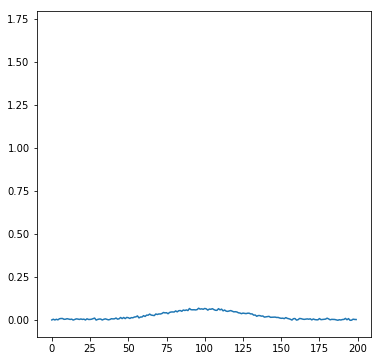

In [28]:
plt.figure(figsize=(6,6))
plt.plot((M)[100])
plt.ylim(-0.1,1.8)

In [29]:
y = np.linspace(0,1,200)

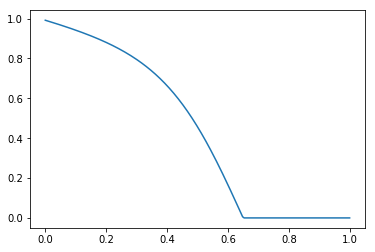

In [30]:
r = list(map(lambda T: 1.48/(1.0+np.exp(8.0*(T-0.65))) - 1 - 0.4*T + 0.52 if T<=0.65 else 0.0, y))
plt.plot(y,r)

In [31]:
print (min(r))

0.0


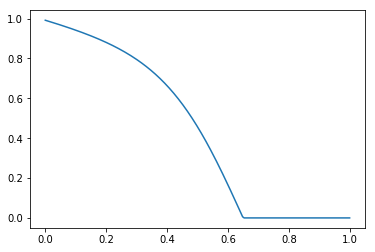

In [32]:
r = list(map(lambda T: 1.48/(1.0+np.exp(8.0*(T-0.65))) - 1 - 0.4*T + 0.52 if T<=0.65 else 0.0, y))
plt.plot(y,r)